<a href="https://colab.research.google.com/github/NoerNikmat/nlp_exploratory_data_analysis/blob/main/NLP_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Dataset**


### Description

**Women's E-Commerce Clothing Reviews on Kaggle**

---

***Link Dataset***: 

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews


***Context***

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.



***Content***

This dataset includes **23486 rows** and **10 feature variables**. Each row corresponds to a customer review, and includes the variables:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece 
being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review** Text: String variable for the review body.
- **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- **Recommended** IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.


***Acknowledgements***

Anonymous but real source


***Inspiration***

Nicapotato, an owner of dataset Women's E-Commerce Clothing Reviews that looks forward to coming quality NLP! There are also some great opportunities for feature engineering and multivariate analysis.

***Publication***

[Statistical Analysis on E-Commerce Reviews, with Sentiment Classification using Bidirectional Recurrent Neural Network](https://www.researchgate.net/publication/323545316_Statistical_Analysis_on_E-Commerce_Reviews_with_Sentiment_Classification_using_Bidirectional_Recurrent_Neural_Network)

by [Abien Fred Agarap - Github](https://github.com/AFAgarap/ecommerce-reviews-analysis)



### Metadata

**Usage Information**

---



- License [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)
- Visibility **public**


**Maintainers**

---



- Dataset owner [nicapotato](https://www.kaggle.com/nicapotato)

**Updates**

---
    
    Expected update frequency (Not specified)

    Last updated 2018-02-04
    Date created 2018-02-04
    Current version Version 1

## **Objectives**

**Problem Framing**
* Find Exploratory Data Analysis from the dataset


**Ideal Outcome**
* A success metric is that sentences could find insight for analysis.
* Success means text data excellent for making analysis. 
* Failure means text data used for sentiment predicted is no better than current heuristics.

**Heuristics**
* Consider the text data already for analysis. Assume that data used to exploratory graph and ext

**Formulation of the problem**
* Data Preparation and Explotratory Data Analysis

## **References**

[Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)

## **Programming With Python**

### **Import Dataset**





Install Kaggle for upload dataset into google colab

In [1]:
!pip install -q kaggle

Upload Kaggle API key

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noer001","key":"5c61dd059665969d566be961b002599c"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download dataset from Kaggle

In [4]:
! kaggle datasets download -d 'nicapotato/womens-ecommerce-clothing-reviews/download'  

  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 93.1MB/s]


In [5]:
!ls

kaggle.json  sample_data  womens-ecommerce-clothing-reviews.zip


In [6]:
!unzip -q womens-ecommerce-clothing-reviews.zip

In [7]:
!ls

 kaggle.json  'Womens Clothing E-Commerce Reviews.csv'
 sample_data   womens-ecommerce-clothing-reviews.zip


### **Import Libraries**

In [8]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [9]:
woman = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
woman.tail(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [10]:
for column in ["Division Name","Department Name","Class Name","Review Text"]:
    woman = woman[woman[column].notnull()]
woman.drop(woman.columns[0], inplace=True, axis=1)

In [11]:
woman.shape

(22628, 10)

In [12]:
woman['Label'] = 0

In [13]:
woman.loc[woman.Rating >= 3, ['Label']] = 1

In [14]:
woman['Word Count'] = woman['Review Text'].str.split().apply(len)

In [15]:
woman.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count
4981,1110,38,Elegant sundress,I'm 5'4 with an hourglass shape. i love this d...,5,1,1,General,Dresses,Dresses,1,29
11725,850,70,Beautiful fabric and design,I was immediately drawn to this top in the cat...,5,1,0,General Petite,Tops,Blouses,1,96
9088,1035,61,Cute jeans,I really liked these jeans. i had to return th...,4,1,2,General Petite,Bottoms,Jeans,1,42
9194,1104,35,Waist,Crew stripe sheath fitted very well until i tu...,2,0,0,General,Dresses,Dresses,0,91
9239,820,62,NaN,Very feminine! comes with a coordinating cami....,5,1,1,General,Tops,Blouses,1,21


In [16]:
woman.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0


In [17]:
woman[['Title', 'Division Name', 'Department Name', 'Class Name']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


### **Exploratory Data Analysis**

Text(0.5, 1.0, 'Age Distribution ')

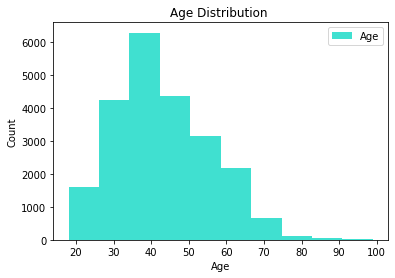

In [18]:
plt.hist(woman['Age'], color="turquoise", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution ")

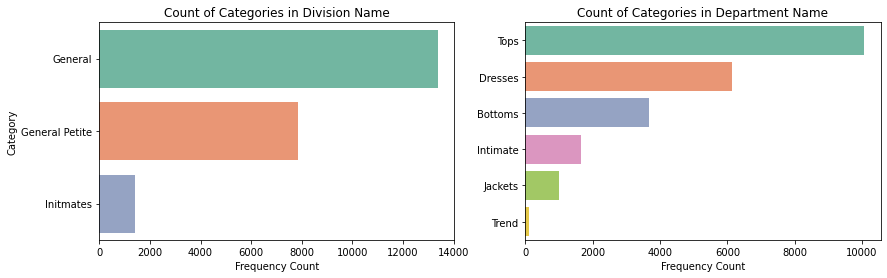

In [19]:
Divdep = ['Division Name', 'Department Name']
f, axes = plt.subplots(1, len(Divdep), figsize=(14, 4), sharex=False)

for i, x in enumerate(Divdep):
    sns.countplot(y=x, data=woman, order=woman[x].value_counts().index, ax=axes[i], color="turquoise", palette="Set2")
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

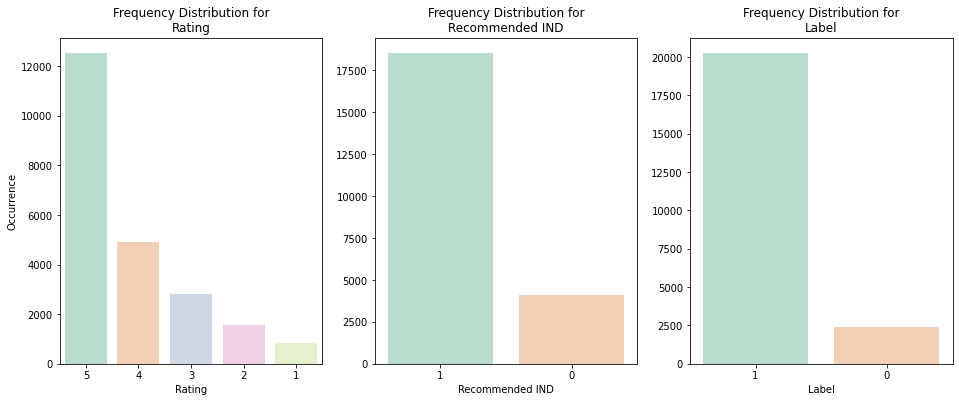

In [20]:
Categorical_dtypes = ['Rating', 'Recommended IND', 'Label']
increment = 0
f, axes = plt.subplots(1, len(Categorical_dtypes), figsize=(16, 6), sharex=False)

for i in range(len(Categorical_dtypes)):
    sns.countplot(x=Categorical_dtypes[increment], data=woman, order=woman[Categorical_dtypes[increment]].value_counts().index, ax=axes[i], color="turquoise", palette="Pastel2")
    axes[i].set_title('Frequency Distribution for\n{}'.format(Categorical_dtypes[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(Categorical_dtypes[increment]))
    increment += 1
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.savefig('freqdist-rating-recommended-label.png', format='png', dpi=300)
plt.show()

Working with Text

In [21]:
pd.set_option('max_colwidth', 500)
woman[["Title","Review Text", "Rating"]].sample(2)

,Title,Review Text,Rating
10054,Perfect grab & go!,"I bought this dress in ivory and then bought the navy on sale, i loved it so much. i'm 5'4"", 117, and the petite medium was perfect. love the kicky flare, and the lining makes it so comfortable. an effortless, fun dress - perfect for hot summer lunch.",5
10930,Gorgeous dress but received it damaged,"I ordered this dress in my usual size and unfortunately when it arrived, it was damaged and also a little too big. the fabric had lots of pulls in it like it had been tried on many times.\n\ni called customer service and requested a replacement in a smaller size. it fit great and looked beautiful but there was a rip in the sleeve.\n\nthis is a gorgeous dress and very flattering and well fitting (if you size down), but i had to return both and wear something else to a holiday party.\n\ni'd on...",3


Text Cleaning

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

Sentiment Analysis

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [25]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
woman['Review Text']= woman['Review Text'].astype(str)

# Applying Model, Variable Creation
woman['Polarity Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
woman['Neutral Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
woman['Negative Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
woman['Positive Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
woman['Sentiment'] = ''
woman.loc[woman['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
woman.loc[woman['Polarity Score'] == 0, 'Sentiment'] = 'Neutral'
woman.loc[woman['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

Normalize Plots for Sentiment Distribution

In [26]:
def percentstandardize_barplot(x, y, hue, data, ax=None, order=None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x=x, y=y, hue=hue, ax=ax, order=order, color="turquoise",
                data=(data[[x, hue]]
                      .reset_index(drop=True)
                      .groupby([x])[hue]
                      .value_counts(normalize=True)
                      .rename('Percentage').mul(100)
                      .reset_index()
                      .sort_values(hue)))
    plt.title('Percentage Frequency of {} by {}'.format(hue, x))
    plt.ylabel('Percentage %')

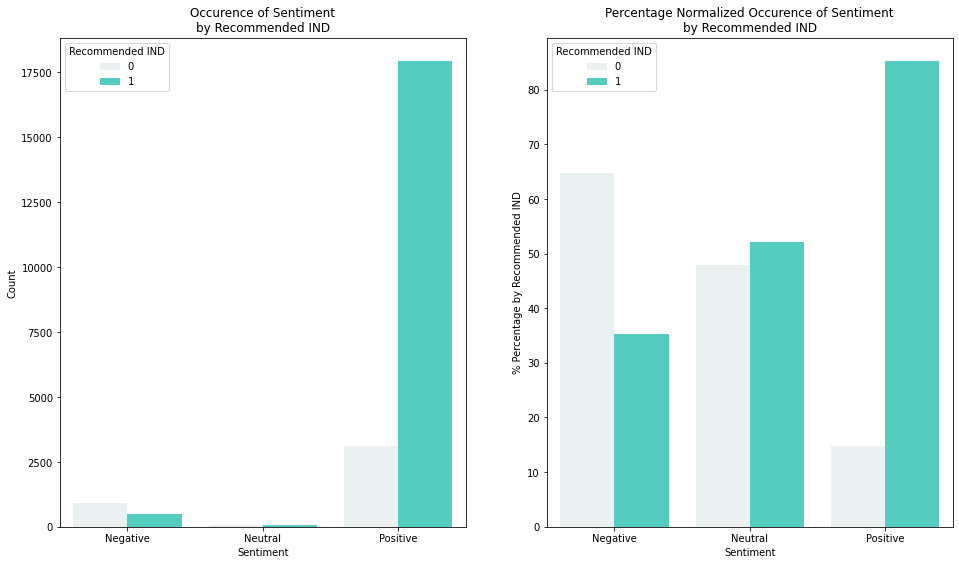

In [27]:
huevar = 'Recommended IND'
xvar = 'Sentiment'
f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=xvar, hue=huevar,data=woman, ax=axes[0], order=['Negative', 'Neutral', 'Positive'], color="turquoise")
axes[0].set_title('Occurence of {}\nby {}'.format(xvar, huevar))
axes[0].set_ylabel('Count')
percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=woman, ax=axes[1], )
axes[1].set_title('Percentage Normalized Occurence of {}\nby {}'.format(xvar, huevar))
axes[1].set_ylabel('% Percentage by {}'.format(huevar))
plt.savefig('norm-sentimentdist.png', format='png', dpi=300)
plt.show()

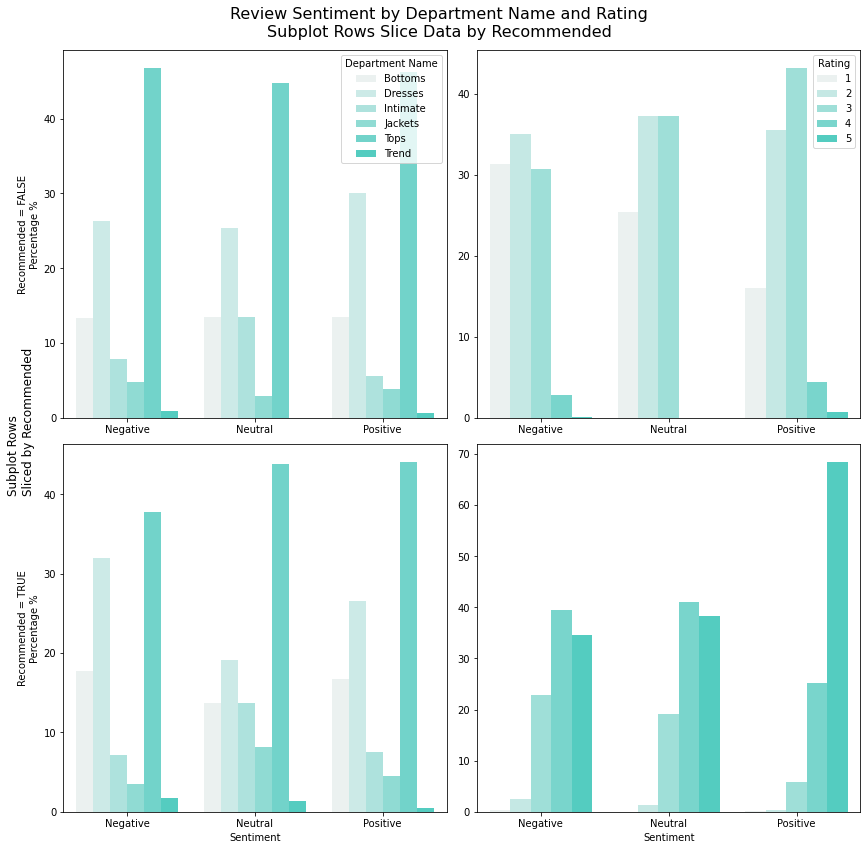

In [28]:
xvar = 'Sentiment'
huevar = 'Department Name'
rowvar = 'Recommended IND'

# Plot
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
for i,x in enumerate(set(woman[rowvar][woman[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=woman[woman[rowvar] == x],
                               ax=axes[i,0], order=['Negative','Neutral','Positive'])
    percentstandardize_barplot(x=xvar, y='Percentage', hue='Rating', data=woman[woman[rowvar] == x],
                               ax=axes[i,1], order=['Negative','Neutral','Positive'])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,0].set_ylabel('Recommended = FALSE\nPercentage %')
axes[1,0].set_ylabel('Recommended = TRUE\nPercentage %')
axes[1,1].set_title('')

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle('Review Sentiment by Department Name and Rating\nSubplot Rows Slice Data by Recommended', fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.savefig('sentiment-deptname-rating-recommended.png', format='png', dpi=300)
plt.show()

In [29]:
stopwords = set(STOPWORDS)
size = (20, 10)

def cloud(text, title, stopwords=stopwords, size=size):
    mpl.rcParams['figure.figsize'] = (10.0, 10.0)
    mpl.rcParams['font.size'] = 12
    mpl.rcParams['savefig.dpi'] = 300
    mpl.rcParams['figure.subplot.bottom'] = .1
    
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords).generate(str(text))
    
    fig = plt.figure(figsize=size, facecolor='w')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=50, color='turquoise')
    plt.tight_layout()
    plt.savefig('{}.png'.format(title), format='png', dpi=300)
    plt.show()
    
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    mpl.style.use('ggplot')
    rslt.plot.bar(rot=0)
    
def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rlst = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    return rlst

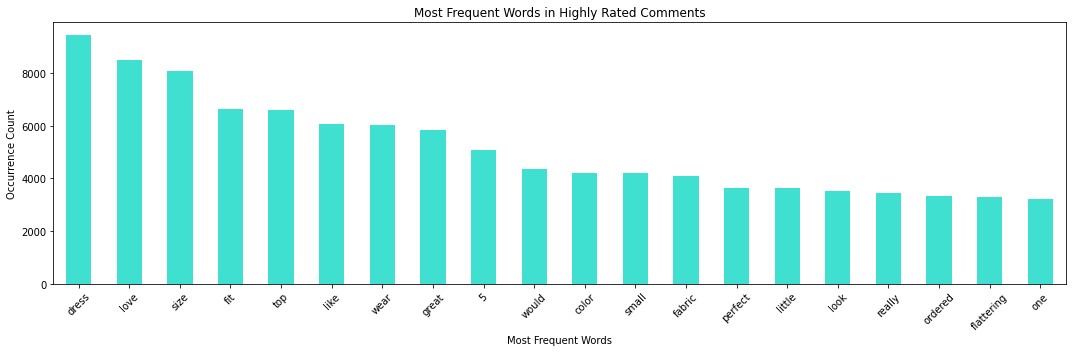

In [30]:
title ='Most Frequent Words in Highly Rated Comments'
temp = woman['Review Text'][woman.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as 'dress'
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(woman['Class Name'][woman['Class Name'].notnull()].unique())]
                + ['dress', 'petite'])

# Bar Chart
wordfreq(preprocessing(temp), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='turquoise',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.savefig('most-freq-words-high-rate-comments.png', format='png', dpi=300)
plt.show()

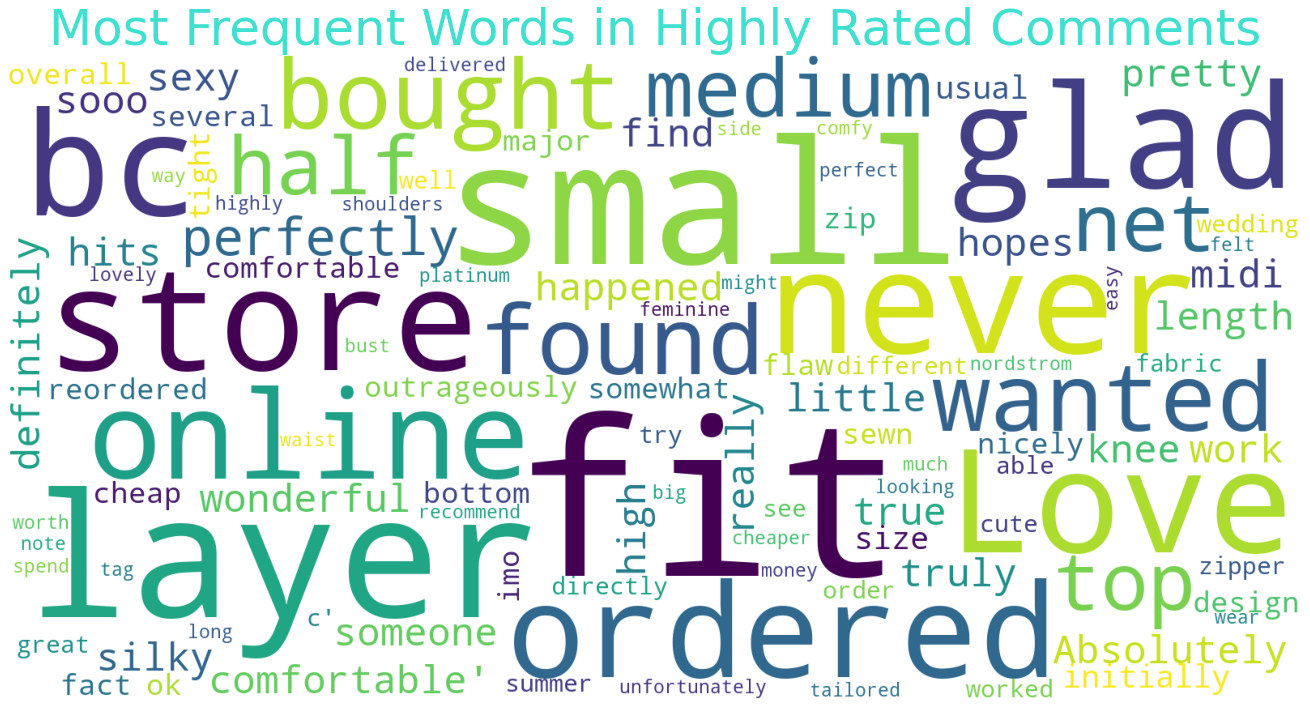

In [31]:
# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

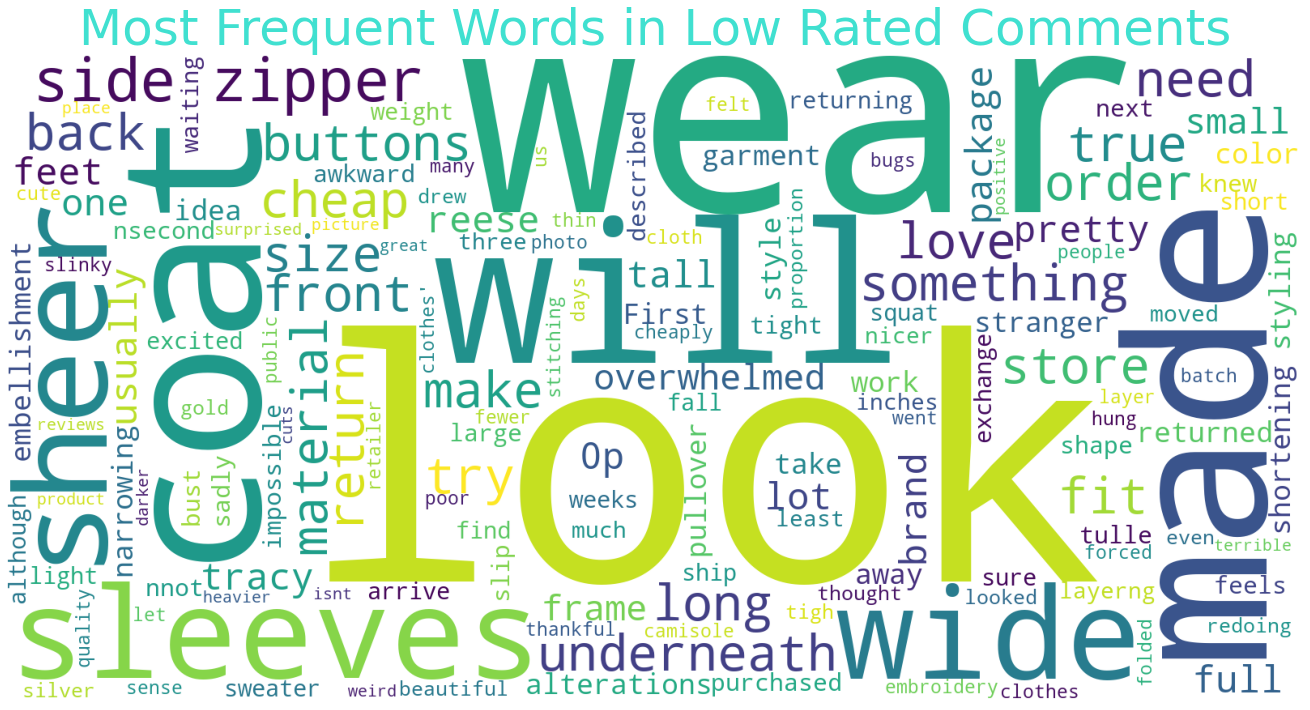

In [32]:
# Low Raited
title ='Most Frequent Words in Low Rated Comments'
temp = woman['Review Text'][woman.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as 'dress'
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(woman['Class Name'][woman['Class Name'].notnull()].unique())]
                + ['dress', 'petite', 'skirt', 'shirt'])

# Cloud
cloud(temp.values, title=title, stopwords=new_stop)